In [ ]:
#File to find the CCZ Unitary function
#1. optimization on the Fidelity from random U
#2. optimization on both the Fidelity and the success probability, starting from U obtained in 1.

In [163]:
from scipy.optimize import minimize, NonlinearConstraint
import numpy as np 
import matplotlib.pyplot as plt


In [164]:
import numpy as np
from itertools import permutations

def permanent(matrix):
    n = len(matrix)
    perm_sum = 0

    for perm in permutations(range(n)):
        product = 1
        for i in range(n):
            product *= matrix[i, perm[i]]
        perm_sum += product

    return perm_sum

In [165]:
def idxs_delete(bitstring):

    idx_to_delete = []
    for i,bit in enumerate(bitstring):
        if int(bit) == 0:
            idx_to_delete.append(i)
            
    return np.array(idx_to_delete)

In [166]:
def drop_columns_and_rows(matrix, input_state):
    
    # Convert binary string to a list of integers
    indices_to_drop = idxs_delete(input_state)

    # Drop the specified columns and rows
    if indices_to_drop.size == 0:
        return matrix
    else:
        new_matrix = np.delete(matrix, indices_to_drop, axis=0)
        new_matrix = np.delete(new_matrix, indices_to_drop, axis=1)
        return new_matrix

In [167]:
def generate_input_states(inp_length):
    try:
        input_states = [format(i, f'0{inp_length}b') for i in range(2**inp_length)]
    except:
        input_states = []
        print('Error')
        
    return input_states

In [168]:
def return_permanents(matrix):
    
    input_states = generate_input_states(int(len(matrix)/2))
    perm_list = []
    
    for inp_state in input_states:
        perm_list.append(permanent(drop_columns_and_rows(matrix, inp_state)))
        
    return np.array(perm_list)

In [169]:
N = 6 #number of modes in the system
A_target = np.array([1, 1, 1, 1, 1, 1 ,1, -1]) #target output of CCZ
print(A_target)

[ 1  1  1  1  1  1  1 -1]


In [170]:
#cost function
def cost_fun_F(U_vector): 
    #reshape to matrix
    U = U_vector.reshape(N,N)
    U = U/ np.linalg.norm(U,2) 
    A_vect = return_permanents(U) #matrix with the permanents
    
    F = ((np.dot(A_target, A_vect))**2)/(8*np.linalg.norm(A_vect)**2)
    
    return -1*(F)

In [171]:
#constraint (unused for now)
def constraint_norm1(x):
    return np.linalg.norm(x,2) - 1

constraint = {'type': 'eq', 'fun': constraint_norm1}
nonlinear_constraint = NonlinearConstraint(constraint_norm1, 0, 0)

In [172]:
#minimization test
U_init = np.random.rand(N,N)
U_init = U_init.flatten()
minimum = minimize(cost_fun_F, U_init, method='BFGS')#, constraints=[constraint])
print(minimum)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.9999999999487106
        x: [ 1.058e+00 -2.181e+00 ...  1.105e+00  2.690e-01]
      nit: 40
      jac: [-4.470e-08  1.267e-07 ...  3.427e-07  3.576e-07]
 hess_inv: [[ 4.079e+00 -1.048e+00 ... -4.208e+00 -3.806e-01]
            [-1.048e+00  2.126e+01 ... -5.321e+00  2.097e+00]
            ...
            [-4.208e+00 -5.321e+00 ...  1.245e+01 -8.039e-01]
            [-3.806e-01  2.097e+00 ... -8.039e-01  1.373e+00]]
     nfev: 1517
     njev: 41


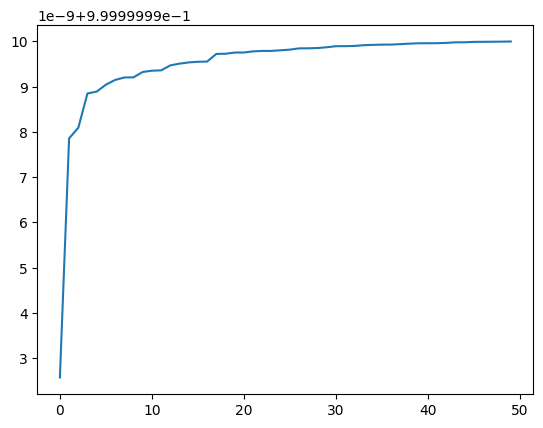

[0.99999999 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


In [173]:
cost = []
U_matrices = []

for i in range(50):
    U_init = np.random.rand(N,N)
    U_init = U_init.flatten() #needs to be flattened for minimization
    #minimization
    minimum = minimize(cost_fun_F, U_init, method='BFGS')#, tol=1e-4)#, constraints=[nonlinear_constraint])
    cost.append(-1*minimum.fun)
    U_matrices.append(minimum.x)
 
cost = np.array(cost)
U_matrices = np.array(U_matrices)    
sorted_indices = np.argsort(cost)
cost = cost[sorted_indices]
U_matrices = U_matrices[sorted_indices]
    
plt.plot(cost)
plt.show()

print(cost)

In [179]:
#cost function
def cost_fun(U_vector): 
    #reshape to matrix
    U = U_vector.reshape(N,N)
    U = U/ np.linalg.norm(U,2) 
    A_vect = return_permanents(U)

    F = ((np.dot(A_target, A_vect))**2)/(8*np.linalg.norm(A_vect)**2)
    
    S = A_vect[0]**2            #success probability
    
    return -1*(20000*F + S )

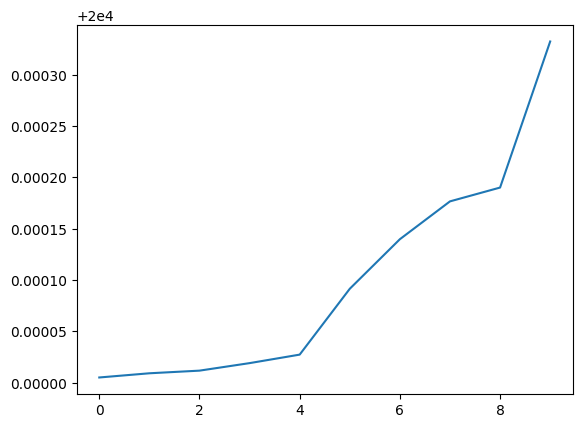

[20000.00000497 20000.00000905 20000.00001162 20000.00001894
 20000.00002723 20000.00009136 20000.00013962 20000.00017647
 20000.00018993 20000.0003322 ]


In [180]:
cost_final = []
U_matrix_final = []
for i in range(10):
    U_init = U_matrices[49-i]
    minimum = minimize(cost_fun, U_init, method='BFGS', tol=1e-4)#, constraints=[nonlinear_constraint])
    cost_final.append(-1*minimum.fun)
    U_matrix_final.append(minimum.x) #minimum.x

cost_final = np.array(cost_final)
U_matrix_final = np.array(U_matrix_final)    
sorted_indices_fin = np.argsort(cost_final)
cost_final = cost_final[sorted_indices_fin]
U_matrix_final = U_matrix_final[sorted_indices_fin]
    
plt.plot(cost_final)
plt.show()

print(cost_final)

In [181]:
#cost function
def cost_fun_S(U_vector): 
    #reshape to matrix
    U = U_vector.reshape(N,N)
    U = U/ np.linalg.norm(U,2) 
    A_vect = return_permanents(U)
    A_tar_vect = A_target.flatten()
    #print(F)
    S = A_vect[0]**2            #success probability
    
    return -1*(S )

In [182]:
for i in range(4):
    print("Success probability: ",-1*cost_fun_S(U_matrix_final[9-i]))
    print("Fidelity: ",-1*cost_fun_F(U_matrix_final[9-i]),"\n")

Success probability:  0.0003322021528042143
Fidelity:  0.9999999999998143 

Success probability:  0.00018993187947168762
Fidelity:  0.9999999999997453 

Success probability:  0.0001764788973669814
Fidelity:  0.9999999999997239 

Success probability:  0.0001396326377243469
Fidelity:  0.999999999999397 



In [183]:
print(U_matrix_final[3].reshape(N,N))

[[ 1.48196546e+00  1.21807580e+00  6.30688295e-01  1.98528909e+00
   1.91983034e+00  7.26317604e-01]
 [-2.37370025e+00  8.73996293e-01 -1.79076837e+00  3.65861069e-01
   6.67387308e-01  1.77387435e+00]
 [-2.71821813e+00  3.73221355e-01  6.84249124e-01  2.26741571e-01
   9.68750348e-01  1.67340930e+00]
 [ 4.13724481e-01  1.84681078e+00  1.09104176e+00  2.00431125e-01
   7.62675486e-01 -3.04953047e-01]
 [ 1.37727828e+00  4.60976287e-01  1.50784824e+00  1.80346987e-04
   3.81766211e-02  1.01171178e+00]
 [ 6.67133538e-01  1.48403767e+00  1.07341429e+00  5.47189675e-01
   4.36526835e-01 -2.57745769e-02]]
